In [27]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "/home/xc425/project/models"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

run_id               task  \
156  303d7da2-9665-4aa8-a250-ae5334975887  linear_regression   
86   6d271bfc-a378-48db-ae34-633ac4f97c39  linear_regression   
2    4b8552d3-e8ad-4312-a292-92b20ba0c675  linear_regression   
40   622cc550-b317-4cc9-84ac-e4878f15be5d  linear_regression   
20   20df778d-9b40-41f6-855e-857db308dc61  linear_regression   
..                                    ...                ...   
24   56fc7009-1f4b-4c71-99f5-cbce00c8ce58  linear_regression   
100  b83ad19c-27a5-4eae-9a76-3fa4655febbd  linear_regression   
14   fb56e506-3bc5-4e94-96ba-6e45d0259808  linear_regression   
50   92b7f20e-46ac-4916-a896-287799769692  linear_regression   
128  b7e099d8-8fe4-42cc-925c-7ebf267b66ba  linear_regression   

                model kwargs  num_tasks  num_examples  n_dims  n_layer  \
156  Transformer-five                -1            -1       5        5   
86   Transformer-five                -1            -1       5        5   
2    Transformer-five                -1            -1       5        5   
40   Transformer-five                -1            -1       5        5   
20   Transformer-five                -1            -1       5        5   
..                ...    ...        ...           ...     ...      ...   
24     Transformer-xs                -1            -1       5        3   
100    Transformer-xs                -1            -1       5        3   
14     Transformer-xs                -1            -1       5        3   
50     Transformer-xs                -1            -1       5        3   
128    Transformer-xs                -1            -1       5        3   

     n_head                       run_name  
156       8       linear_regression_five_1  
86        8      linear_regression_five_10  
2         8      linear_regression_five_10  
40        8      linear_regression_five_10  
20        8      linear_regression_five_10  
..      ...                            ...  
24        2  linear_regression_tiny_try2nd  
100       2  linear_regression_tiny_try3rd  
14        2  linear_regression_tiny_try4th  
50        2  linear_regression_tiny_try4th  
128       2  linear_regression_tiny_try4th  

[165 rows x 10 columns]

In [29]:
task = "linear_regression"
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "07ef1929-f0d1-4e6f-bd26-e04706f9ccef"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training

# Plot pre-computed metrics

linear_regression_five_no_pos_30d_1 07ef1929-f0d1-4e6f-bd26-e04706f9ccef


100%|██████████| 15/15 [00:00<00:00, 233883.12it/s]

{'half_subspace': {'Transformer-five': {'mean': [0.9986762364705404, 0.9851741790771484, 0.8244998296101888, 0.7691079457600911, 0.7899916330973308, 0.6884106953938802, 0.64705810546875, 0.5780946731567382, 0.544569714864095, 0.45347677866617836, 0.41795431772867836, 0.40964975357055666, 0.38188165028889975, 0.3253803253173828, 0.2818364461263021, 0.26151469548543294, 0.2424184481302897, 0.21079003016153972, 0.23563178380330405, 0.19554545084635416, 0.17227741877237956, 0.15488672256469727, 0.1504295031229655, 0.15618141492207846, 0.1419345696767171, 0.1433493137359619, 0.13054038683573405, 0.12761351267496746, 0.11795925299326579, 0.11763295332590738, 0.11263423760732015, 0.10372673670450847, 0.10718852678934733, 0.11390031178792318, 0.10994803110758464, 0.10956687927246093, 0.10373259385426839, 0.11262598832448324, 0.11597854296366374, 0.10986624558766683, 0.10028606255849203, 0.10586352348327636, 0.10280410448710124, 0.10679961045583089, 0.10254862308502197, 0.10244781176249186, 0.1

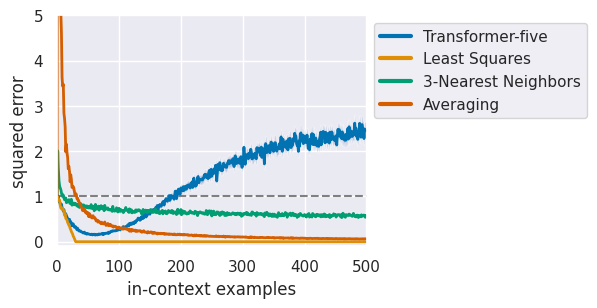

In [30]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
print(metrics)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
basic_plot(metrics["standard"], models=models)
plt.show()

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [0.9986762364705404, 0.9851741790771484, 0.8244998296101888, 0.7691079457600911, 0.7899916330973308, 0.6884106953938802, 0.64705810546875, 0.5780946731567382, 0.544569714864095, 0.45347677866617836, 0.41795431772867836, 0.40964975357055666, 0.38188165028889975, 0.3253803253173828, 0.2818364461263021, 0.26151469548543294, 0.2424184481302897, 0.21079003016153972, 0.23563178380330405, 0.19554545084635416, 0.17227741877237956, 0.15488672256469727, 0.1504295031229655, 0.15618141492207846, 0.1419345696767171, 0.1433493137359619, 0.13054038683573405, 0.12761351267496746, 0.11795925299326579, 0.11763295332590738, 0.11263423760732015, 0.10372673670450847, 0.10718852678934733, 0.11390031178792318, 0.10994803110758464, 0.10956687927246093, 0.10373259385426839, 0.11262598832448324, 0.11597854296366374, 0.10986624558766683, 0.10028606255849203, 0.10586352348327636, 0.10280410448710124, 0.10679961

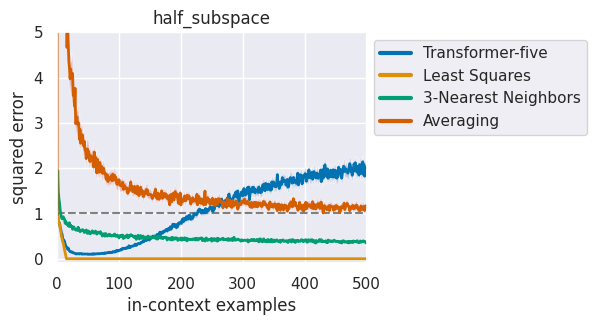

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [1.0160821278889973, 1.0846448262532553, 0.8981395721435547, 0.9106177012125651, 0.9194956461588542, 0.7891049067179362, 0.8161705652872722, 0.7733824412027995, 0.8258379618326823, 0.7532128016153972, 0.6899154027303059, 0.7180000305175781, 0.6630285898844401, 0.6511541366577148, 0.5790269851684571, 0.6197124481201172, 0.5863361358642578, 0.5325613021850586, 0.5118275006612142, 0.5016137758890787, 0.46534627278645835, 0.4520254135131836, 0.4637974421183268, 0.44710906346638996, 0.46070779164632164, 0.4133355776468913, 0.3734121004740397, 0.37047491073608396, 0.38081576029459635, 0.35006430943806965, 0.34569060007731117, 0.3366203943888346, 0.3259922981262207, 0.31594874064127604, 0.2831833839416504, 0.31880722045898435, 0.31088298161824546, 0.2790161768595378, 0.27960392634073894, 0.27603143056233725, 0.24599825541178386, 0.26982412338256834, 0.2797708829243978, 0.2467639923095703, 0

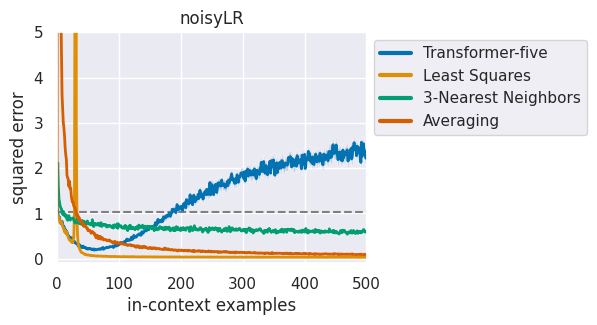

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [1.046703783671061, 1.0391977945963542, 0.99772523244222, 1.0169948577880858, 0.9764102935791016, 1.0418774286905925, 1.0395743687947592, 0.9975869496663411, 0.974147351582845, 1.0236626942952474, 1.0026432037353517, 1.0877981821695963, 1.0688011169433593, 0.9391552607218424, 1.0445265452067056, 0.9875008900960286, 1.0577882130940754, 1.0223292032877604, 0.953485107421875, 0.9829686482747396, 1.0615690231323243, 1.0429129282633463, 0.9714862823486328, 0.9493005116780598, 0.9721362431844075, 1.0085923512776693, 1.013201077779134, 1.0769147237141927, 1.0535874684651694, 0.9941050211588541, 0.17721756299336752, 0.18995885848999022, 0.18152491251627603, 0.16942410469055175, 0.19151026407877605, 0.2108753204345703, 0.2237949053446452, 0.23062467575073242, 0.2392705758412679, 0.2310930569966634, 0.20539547602335612, 0.2146360715230306, 0.2254832903544108, 0.23645811080932616, 0.25490112304

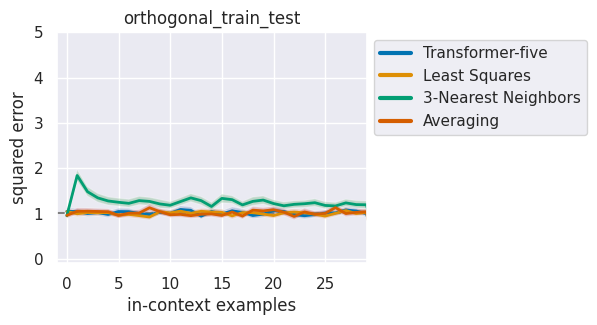

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [0.961311149597168, 0.11792555650075277, 0.05037999153137207, 0.045283305644989016, 0.04718635082244873, 0.04799939393997192, 0.05068427324295044, 0.0506504495938619, 0.04847042163213094, 0.050622932116190594, 0.05044370492299398, 0.056286760171254474, 0.05618621905644735, 0.05850472847620646, 0.057786901791890465, 0.06377597649892171, 0.05785347620646159, 0.060328694184621175, 0.06153871615727743, 0.06017308632532756, 0.05872652530670166, 0.06472733815511068, 0.06566893259684245, 0.0652763565381368, 0.06370438734690348, 0.06809680461883545, 0.06521023909250895, 0.06232906977335612, 0.06528172890345256, 0.06750702857971191, 0.0703542153040568, 0.06183036963144938, 0.06443180640538533, 0.06411396662394206, 0.0688003142674764, 0.06332816282908121, 0.06219801108042399, 0.06100558439890544, 0.06534453630447387, 0.06253039836883545, 0.06669070720672607, 0.07170945803324381, 0.063988025983

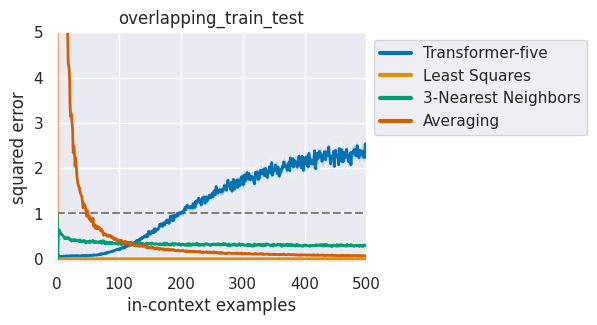

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [1.016981315612793, 0.9955472946166992, 0.9794392903645833, 0.9781762440999349, 0.9236660639444987, 0.8763329188028971, 0.8409038543701172, 0.8578487396240234, 0.8412205378214518, 0.8913201649983724, 0.8328605651855469, 0.8318686167399089, 0.8778432210286459, 0.8557493845621745, 0.7783453623453777, 0.8228296915690104, 0.8136844635009766, 0.8568766276041667, 0.8642344156901042, 0.9153882980346679, 0.9349397659301758, 0.9345225016276042, 1.0246411005655924, 1.0055131276448568, 1.0415698369344075, 1.04857177734375, 1.0459364573160808, 1.05338503519694, 1.022568130493164, 1.160256322224935, 1.1057723999023437, 1.1404150644938151, 1.216156260172526, 1.162678019205729, 1.3110162099202474, 1.3069109598795572, 1.3449689229329427, 1.3761286417643228, 1.3503023783365886, 1.386639912923177, 1.4725868225097656, 1.4552954355875651, 1.3711102803548176, 1.4006219228108725, 1.5039204915364583, 1.540

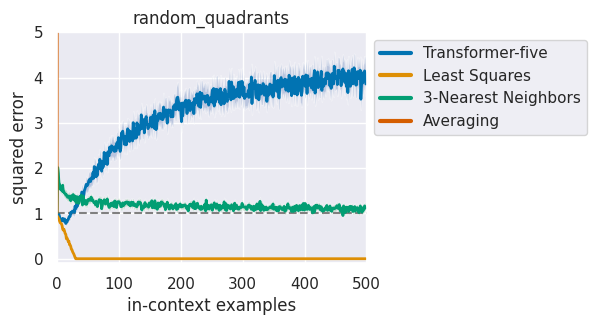

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [0.23505101203918458, 6.904029846191406, 6.880270385742188, 6.1866607666015625, 5.7690378824869795, 5.1069391886393225, 4.7159169514973955, 4.322425333658854, 3.966301981608073, 3.664800516764323, 3.370916239420573, 3.087849426269531, 2.845073954264323, 2.6928756713867186, 2.4228617350260415, 2.328019205729167, 2.2375940958658855, 2.044354248046875, 1.991449737548828, 1.9040519714355468, 1.8584529876708984, 1.7734591166178386, 1.7709866841634114, 1.7209299723307292, 1.6982678731282552, 1.6430226643880208, 1.619659423828125, 1.4947333017985025, 1.5143783569335938, 1.5054634094238282, 1.5312384287516276, 1.5286909739176433, 1.4949307759602866, 1.4560749053955078, 1.4769543965657552, 1.4269151051839193, 1.4654239654541015, 1.4133285522460937, 1.4092969258626302, 1.3979391733805338, 1.4019303639729819, 1.3847033182779949, 1.364016850789388, 1.3244906107584635, 1.3122138977050781, 1.34130

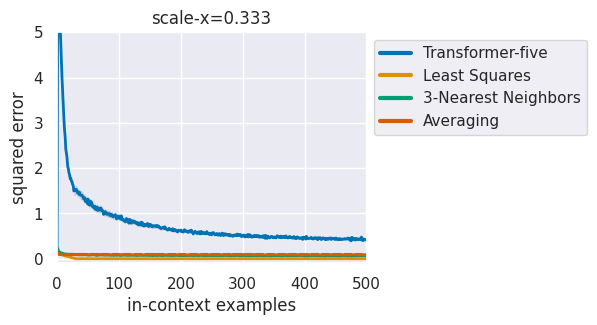

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [0.2575702667236328, 0.6819163004557292, 0.5777051289876302, 0.5550027211507161, 0.6693674723307291, 0.6867746988932292, 0.7839864095052084, 0.89876283009847, 1.040530014038086, 1.1856159210205077, 1.3245560963948568, 1.5297863006591796, 1.8782240549723308, 1.8368273417154948, 2.259285481770833, 2.347813924153646, 2.6435816446940104, 2.6722193400065106, 2.8408960978190105, 2.7912195841471354, 2.9213851928710937, 3.0770284016927083, 3.101105499267578, 3.213860575358073, 3.08827641805013, 3.189854685465495, 3.0961392720540366, 3.1088475545247394, 3.2218775431315105, 3.0323997497558595, 3.078709665934245, 3.006738789876302, 2.9665852864583333, 2.8931554158528647, 2.7676966349283854, 2.675726318359375, 2.6710838317871093, 2.7728548685709637, 2.689825185139974, 2.56449712117513, 2.6548858642578126, 2.673125712076823, 2.419707489013672, 2.4625066121419272, 2.5088783264160157, 2.43516921997

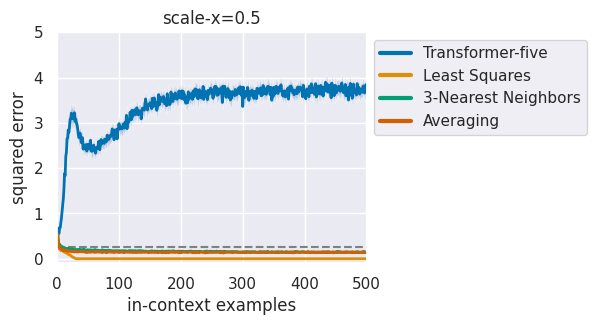

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [4.278533426920573, 3.836614227294922, 3.927678680419922, 3.7709813435872395, 3.8671351114908856, 3.8511067708333333, 3.9198735555013022, 3.6081395467122395, 3.8719022115071615, 3.89094721476237, 4.187202962239583, 4.340172322591146, 3.9750513712565105, 3.9614631652832033, 4.588246154785156, 4.322825622558594, 4.606684875488281, 4.8665517171223955, 4.831209818522136, 5.788350931803385, 5.574165852864583, 6.2239735921223955, 6.136462910970052, 6.356377156575521, 6.8672841389973955, 6.9061737060546875, 7.09920654296875, 7.2845001220703125, 7.268009440104167, 7.732268269856771, 8.30083974202474, 8.698000081380208, 8.363912963867188, 8.549163818359375, 9.101529947916667, 8.471304321289063, 8.954632568359376, 9.227994791666667, 9.209280395507813, 9.294818115234374, 9.488063557942708, 9.908282470703124, 9.888885498046875, 10.160863240559896, 10.306915283203125, 9.921338907877605, 10.068989

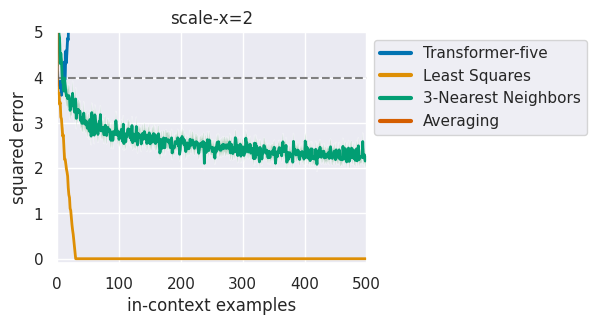

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [8.463196818033854, 9.452908325195313, 9.136154174804688, 10.26279805501302, 9.796180216471354, 10.682068888346354, 10.615249633789062, 10.393793741861979, 9.670470174153646, 10.184429931640626, 10.179402669270834, 10.301168823242188, 9.542946370442708, 10.481283569335938, 10.797780354817709, 10.516661580403646, 10.57387186686198, 10.728989664713541, 11.20615743001302, 10.105963134765625, 9.476389567057291, 10.654954020182291, 10.317708333333334, 10.251815795898438, 10.335903930664063, 10.869167073567708, 11.179726155598958, 10.267364501953125, 10.170583089192709, 11.119902547200521, 10.644422403971355, 11.2142333984375, 10.332217407226562, 10.60848388671875, 11.896086629231771, 10.318204752604167, 10.8130859375, 10.155702718098958, 11.114021809895833, 11.07775166829427, 10.764246622721354, 10.875135294596355, 10.510972086588541, 11.148523966471354, 11.594107055664063, 10.54641418457

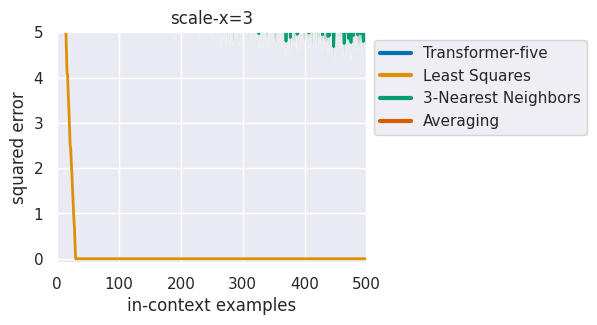

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [0.10493887265523275, 0.1045679251352946, 0.10946142673492432, 0.10133864084879557, 0.10599266688028972, 0.10014443397521973, 0.0950014591217041, 0.0899898370107015, 0.08283640543619791, 0.08059412638346354, 0.080780029296875, 0.07524215380350749, 0.07644317944844564, 0.06751586596171061, 0.06925740242004394, 0.05993565320968628, 0.06303712129592895, 0.05960521697998047, 0.057396531105041504, 0.056237876415252686, 0.05085759957631429, 0.05493544340133667, 0.05134983857472738, 0.04975512027740479, 0.046847434838612874, 0.0451201597849528, 0.042892523606618244, 0.04161655108133952, 0.04215340216954549, 0.038854165871938066, 0.03988751967748006, 0.037535591920216875, 0.03625251452128093, 0.035567673047383626, 0.033878111839294435, 0.03521522680918376, 0.033057524760564165, 0.03232562740643819, 0.03391281763712565, 0.027763821681340537, 0.031216919422149658, 0.030815839767456055, 0.03202

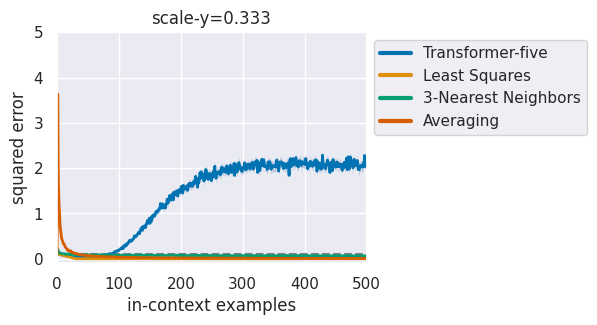

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [0.24570436477661134, 0.2507400830586751, 0.2356139341990153, 0.22288495699564617, 0.2120183785756429, 0.20202533404032388, 0.20177222887674967, 0.2030409812927246, 0.1842964808146159, 0.17899478276570638, 0.17232098579406738, 0.16984354654947917, 0.16458234786987305, 0.14278772672017415, 0.14633275667826334, 0.14579648971557618, 0.14084792137145996, 0.13301409085591634, 0.12200522422790527, 0.12584594885508218, 0.11287020047505697, 0.1108322540918986, 0.10929569403330484, 0.09034381707509359, 0.10380613009134929, 0.09193782806396485, 0.09298482735951742, 0.0902562936147054, 0.08964676856994629, 0.0836026668548584, 0.07567797501881918, 0.07356897195180258, 0.0736597458521525, 0.07499384085337321, 0.07118657430013021, 0.06634674072265626, 0.06584670543670654, 0.06975504557291666, 0.06418917179107667, 0.06780609289805094, 0.060661590099334715, 0.056552207469940184, 0.05541534423828125,

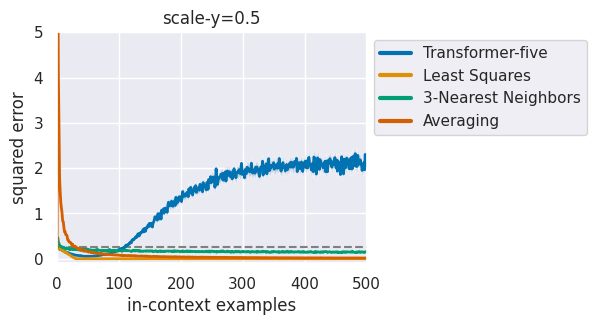

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [4.007772572835287, 3.861646270751953, 3.7214729309082033, 3.756949869791667, 3.4049034118652344, 3.3582684834798178, 3.59218266805013, 2.9452804565429687, 3.187298075358073, 2.8703025817871093, 3.1681910196940106, 2.6340342203776044, 2.781504821777344, 2.3797627766927083, 2.5062077840169272, 2.5006314595540364, 2.400470733642578, 2.209184010823568, 2.3970972696940103, 2.116790771484375, 2.174982452392578, 1.9264478047688802, 2.059325917561849, 2.0532405853271483, 1.9087359110514324, 1.8357098897298176, 1.8474444071451823, 1.773443349202474, 1.522118377685547, 1.5742014567057292, 1.5237834930419922, 1.4880307515462239, 1.4664966583251953, 1.3626899719238281, 1.400523885091146, 1.4051472981770834, 1.3383304595947265, 1.3243783315022786, 1.3206160227457682, 1.3436875661214194, 1.236106236775716, 1.3145545959472655, 1.2838334401448568, 1.229541269938151, 1.2260812123616536, 1.3464271545

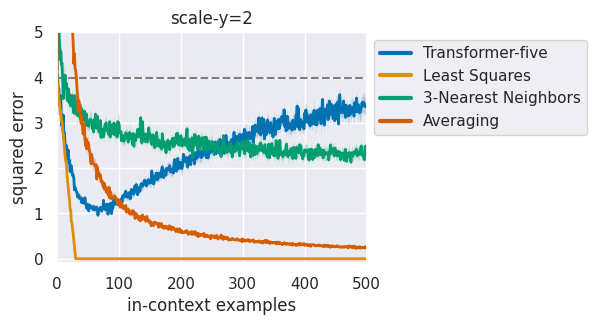

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [9.16999003092448, 9.3498046875, 8.2685791015625, 8.07994384765625, 8.064446512858073, 7.987293497721354, 7.753268432617188, 7.856085713704427, 7.529423014322917, 6.588359578450521, 7.191316731770834, 7.071806844075521, 6.793949381510417, 6.439974466959636, 6.370262145996094, 6.136709594726563, 6.2441864013671875, 6.390370178222656, 5.49266611735026, 5.5648137410481775, 5.910600789388021, 5.975981648763021, 5.961372884114583, 5.162547302246094, 5.609354654947917, 5.536974080403646, 5.269854227701823, 5.557147725423177, 5.513011169433594, 5.200662231445312, 4.828457641601562, 5.374606323242188, 5.1202845255533855, 5.0146230061848955, 5.012468465169271, 5.400816345214844, 5.258723958333333, 4.704791768391927, 5.054052734375, 5.164294942220052, 4.928008015950521, 4.737308756510417, 5.060823567708334, 4.730826314290365, 4.777021789550782, 4.921792602539062, 5.0525563557942705, 4.78455505

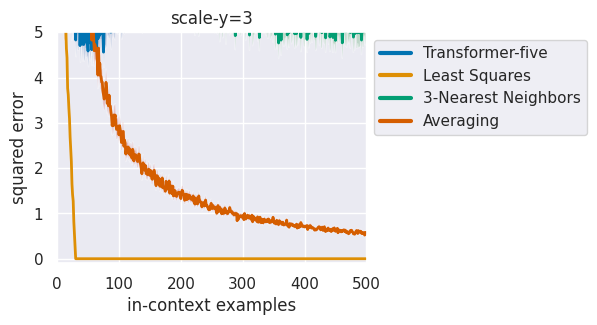

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [1.0029164632161458, 0.7163782755533854, 0.5777060826619466, 0.5364634195963541, 0.406874148050944, 0.35737854639689126, 0.35555782318115237, 0.3766257603963216, 0.3062053044637044, 0.2985039710998535, 0.30222880045572914, 0.30537036259969075, 0.33279193242390953, 0.3219564119974772, 0.35866556167602537, 0.3637603759765625, 0.40092560450236003, 0.359828249613444, 0.4052831013997396, 0.44086971282958987, 0.4781638145446777, 0.5237136205037435, 0.4785389264424642, 0.5442854563395182, 0.594921875, 0.5584796905517578, 0.6292902628580729, 0.690225346883138, 0.700863265991211, 0.7660074234008789, 0.7977128982543945, 0.8141054153442383, 0.8939886728922526, 0.9275815963745118, 0.885841178894043, 0.9057786305745442, 0.9519293467203777, 1.0136246999104819, 1.0607524871826173, 1.0969767252604166, 1.117993418375651, 1.138113021850586, 1.1773526509602865, 1.2124899546305339, 1.228888702392578, 1.

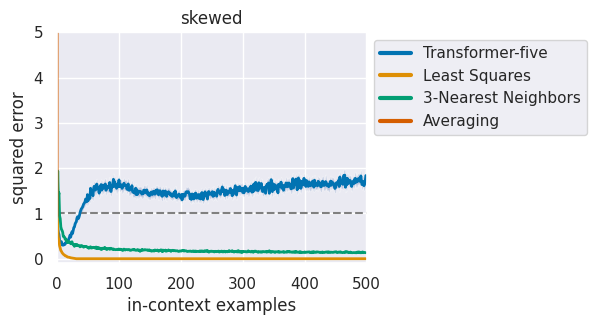

In [31]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    # ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [6]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [7]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

In [8]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
ys = task.evaluate(xs)

In [9]:
with torch.no_grad():
    pred = model(xs, ys)

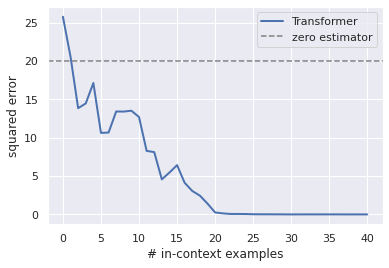

In [10]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [11]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

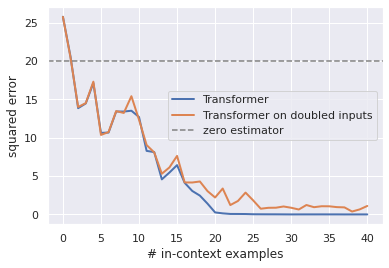

In [12]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.